In [15]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [10]:
results = [
    [
        "(1)",
        1.170,
        0.620,
        0.429,
        54.7,
        1.85,
        2.22,
        1.8711895324149221,
    ],
    [
        "(2-a)",
        1.165,
        0.615,
        0.424,
        55.4,
        1.72,
        2.05,
        1.7579047066985436,
    ],
    [
        "(2-b)",
        1.171,
        0.622,
        0.431,
        52.4,
        2.03,
        2.36,
        2.077042711230944,
    ],
    [
        "(2-c)",
        1.171,
        0.619,
        0.431,
        55.1,
        1.89,
        2.18,
        1.948755660709345,
    ],
    [
        "(3-a)",
        1.168,
        0.620,
        0.423,
        57.7,
        1.61,
        2.04,
        1.6301712067622058,
    ],
    [
        "(3-b)",
        1.175,
        0.624,
        0.434,
        54.3,
        2.00,
        2.24,
        2.043739575822398,
    ],
    [
        "(3-c)",
        1.183,
        0.624,
        0.437,
        54.3,
        1.99,
        2.24,
        2.114605479082971,
    ],
]

df = pl.DataFrame(
    data=results,
    schema=[
        "id",
        "pesq",
        "stoi",
        "estoi",
        "wer",
        "intelligiblity",
        "naturalness",
        "utmos",
    ],
    orient="row",
)
df

id,pesq,stoi,estoi,wer,intelligiblity,naturalness,utmos
str,f64,f64,f64,f64,f64,f64,f64
"""(1)""",1.17,0.62,0.429,54.7,1.85,2.22,1.87119
"""(2-a)""",1.165,0.615,0.424,55.4,1.72,2.05,1.757905
"""(2-b)""",1.171,0.622,0.431,52.4,2.03,2.36,2.077043
"""(2-c)""",1.171,0.619,0.431,55.1,1.89,2.18,1.948756
"""(3-a)""",1.168,0.62,0.423,57.7,1.61,2.04,1.630171
"""(3-b)""",1.175,0.624,0.434,54.3,2.0,2.24,2.04374
"""(3-c)""",1.183,0.624,0.437,54.3,1.99,2.24,2.114605


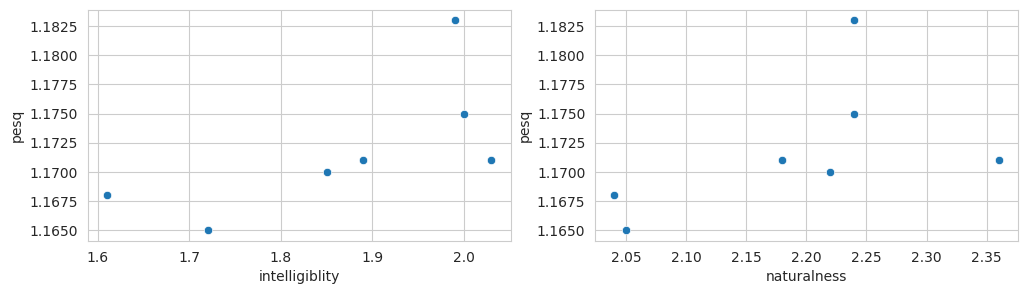

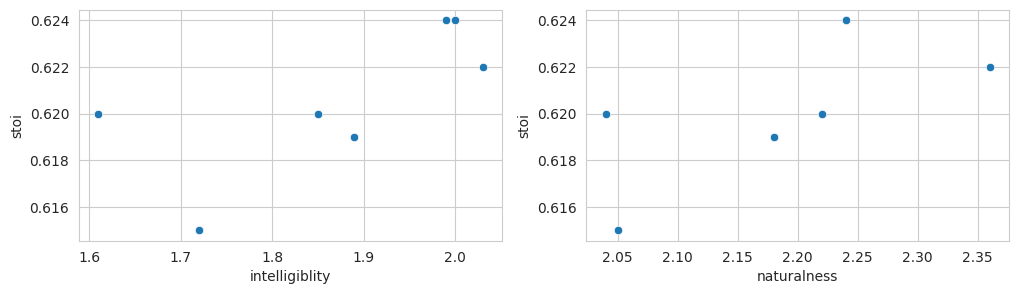

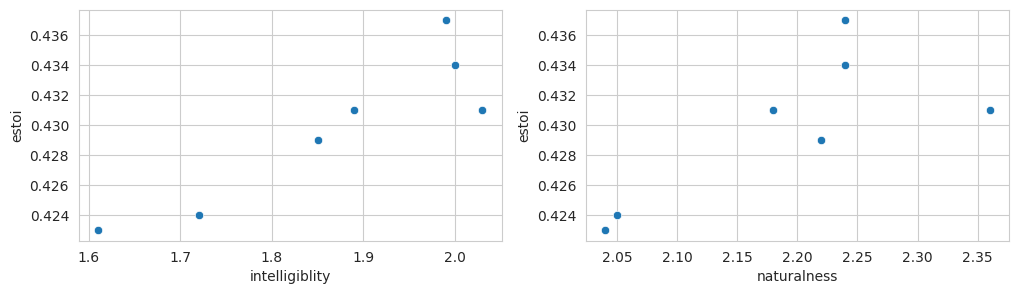

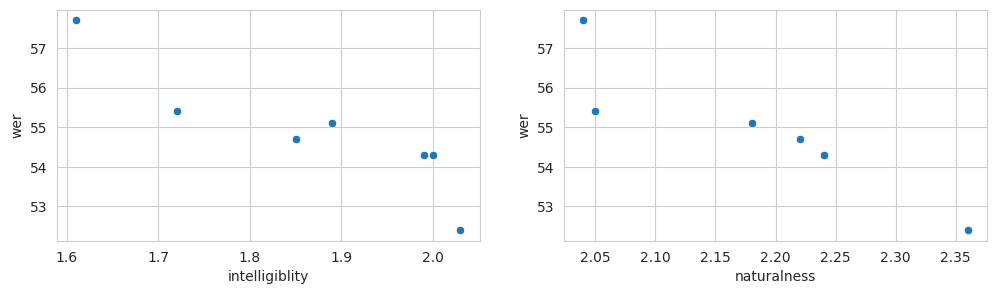

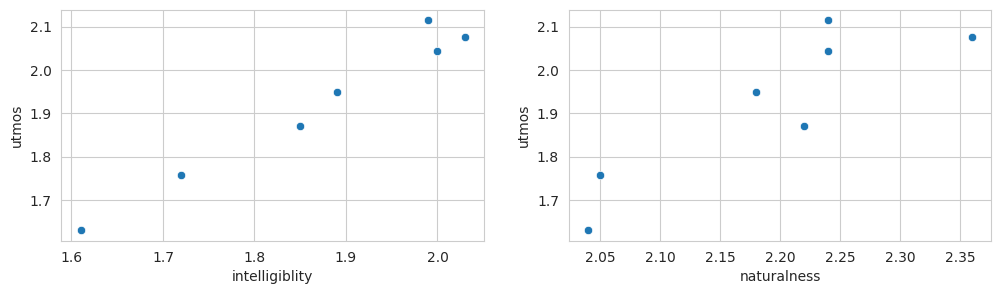

metric,corr_int,corr_nat
str,f64,f64
"""pesq""",0.671738,0.523815
"""stoi""",0.690045,0.676213
"""estoi""",0.900458,0.749109
"""wer""",-0.899809,-0.911115
"""utmos""",0.985877,0.881803


In [24]:
corr_lst = []
for metric in ["pesq", "stoi", "estoi", "wer", "utmos"]:
    corr_int = df.select(pl.corr("intelligiblity", metric)).to_numpy()[0][0]
    corr_nat = df.select(pl.corr("naturalness", metric)).to_numpy()[0][0]
    corr_lst.append([metric, corr_int, corr_nat])
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
    sns.scatterplot(df, x="intelligiblity", y=metric, ax=ax[0])
    sns.scatterplot(df, x="naturalness", y=metric, ax=ax[1])
    plt.show()

df_corr = pl.DataFrame(data=corr_lst, schema=["metric", "corr_int", "corr_nat"], orient="row")
df_corr